In [0]:
# Classification of images with
import matplotlib.pyplot as plt

In [0]:
pip install keras

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print('x_train: ', x_train.shape)
print('x_train: ', y_train.shape)
print('x_train: ', x_test.shape)
print('x_train: ', y_test.shape)

x_train:  (50000, 32, 32, 3)
x_train:  (50000, 1)
x_train:  (10000, 32, 32, 3)
x_train:  (10000, 1)


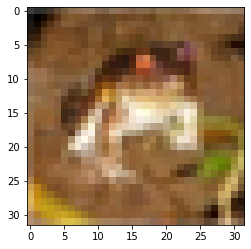

In [11]:
plt.imshow(x_train[0])

In [12]:
# Label of image
print("label is: ", y_train[0])

label is:  [6]


In [0]:
# one hot encoding 
from keras.utils import to_categorical

In [0]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [15]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
# see an example with one hot encoded labels

In [17]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normalize pixels in images to have values in 0 and 1


In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
# Build CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [21]:
# create architechture
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [23]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 51s 1ms/step - loss: 1.6891 - acc: 0.3905 - val_loss: 1.4238 - val_acc: 0.4815
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3109 - acc: 0.5317 - val_loss: 1.2648 - val_acc: 0.5552
Epoch 3/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.1818 - acc: 0.5815 - val_loss: 1.1969 - val_acc: 0.5802
Epoch 4/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0909 - acc: 0.6132 - val_loss: 1.0807 - val_acc: 0.6247
Epoch 5/10
35000/35000 [==============================] - 49s 1ms/step - loss: 0.9882 - acc: 0.6544 - val_loss: 1.0671 - val_acc: 0.6279
Epoch 6/10
35000/35000 [==============================] - 49s 1ms/step - loss: 0.9194 - acc: 0.6801 - val_loss: 1.0757 - val_acc: 0.6247
Epoch 7/10
35000/35000 [==

10000/10000 [==============================] - 4s 444us/step


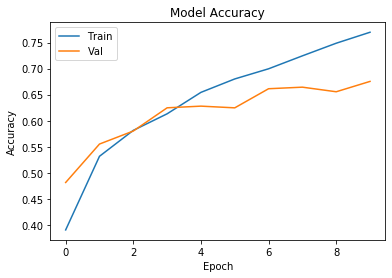

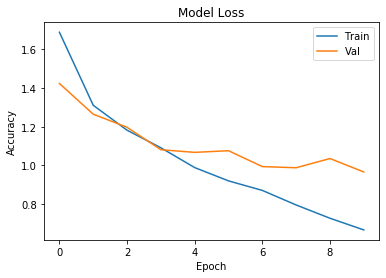

In [24]:
# Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

# Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [0]:
from google.colab import files

In [29]:
uploaded = files.upload()
my_image = plt.imread('cat.4014.jpg')

Saving cat.4014.jpg to cat.4014.jpg


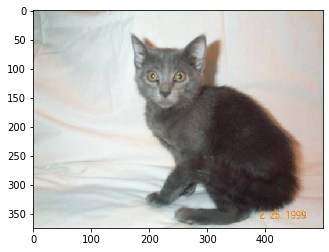

In [30]:
img = plt.imshow(my_image)

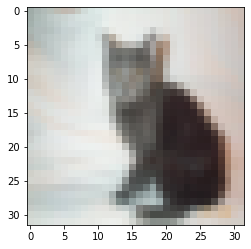

In [31]:
# resize image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

img = plt.imshow(my_image_resized)

In [0]:
# get the props for each class which this pic belongs to

import numpy as np

probabilities = model.predict(np.array([my_image_resized,]))

In [33]:
# print probs
probabilities

array([[1.9524504e-03, 1.5274183e-05, 8.8108974e-03, 5.7622182e-01,
        4.9153506e-03, 1.1560693e-02, 1.8199697e-03, 3.8946280e-01,
        2.3295511e-03, 2.9111546e-03]], dtype=float32)

In [0]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

In [35]:
print("most likely class: ", number_to_class[index[9]], '--probability', probabilities[0, index[9]])

most likely class:  cat --probability 0.5762218


In [36]:
print("second most likely class: ", number_to_class[index[8]], '--probability', probabilities[0, index[8]])

second most likely class:  horse --probability 0.3894628


In [37]:
print("second most likely class: ", number_to_class[index[7]], '--probability', probabilities[0, index[7]])

second most likely class:  dog --probability 0.011560693


In [0]:
model.save('my_model.h5')

In [0]:
# load the model
from keras.models import load_model
model = load_model('my_model.h5')